**Nome:** Iran Freitas Ribeiro

**Matrícula:** 20212021241588

**Disciplina:** TEI - Estatística Aplicada

**Professor:** Celso José Munaro

In [35]:
import numpy as np
from scipy.stats import norm, ttest_rel
import matplotlib.pyplot as plt

In [12]:
def CI(muX, sigma, n, alpha=0.05):
    """
    Calcula o intervalo de confiança de uma distribuição normal
    """
    zalpha_2  = norm.ppf(alpha/2)    
    ci_d = muX - zalpha_2*sigma/np.sqrt(n) # limite superior    
    ci_l = muX + zalpha_2*sigma/np.sqrt(n) # limite inferior
    return ci_l, ci_d

def get_XY(f, v=1):
    np.random.seed(42)
    N = np.random.randint(1,11)
    sx=0.1*N
    sy=v*sx
    mx = N+f*0.1*N
    my = N
    Xrand = np.random.normal(loc=mx, scale=np.sqrt(sx), size=1000)
    Yrand = np.random.normal(loc=my, scale=np.sqrt(sy), size=1000)
    return Xrand, mx, sx, Yrand, my, sy

def test_estatistico(m1, m2, delta0, s1, s2, n1, n2):
    num = m1 - m2 - delta0
    denom = np.sqrt((s1/n1) + (s2/n2))
    return num/denom

## 1

In [13]:
palpha = norm.ppf(1-0.05)
nrejeitar = {}
rejeitar = {}
for f in np.arange(0,2,0.01):
    Xf, mx, sx, Yf, my, sy = get_XY(f)
    amostraX = np.random.choice(Xf, size=20)
    amostraY = np.random.choice(Yf, size=20)
    m1, m2 = [np.mean(amostraX), np.mean(amostraY)]
    s1, s2 = [np.std(amostraX), np.std(amostraY)]
    z0 = test_estatistico(m1, m2, 0, s1=s1**2, s2=s2**2, n1=20, n2=20)
    if (z0 > palpha):
        print ("Rejeitar hipótese nula quando {}".format(f))
        rejeitar['x'], rejeitar['y'] = [amostraX,amostraY]
        rejeitar['mx'], rejeitar['my'] = [mx, my]
        rejeitar['sx'], rejeitar['sy'] = [sx, sy]
        rejeitar['z0'] = z0
        break
    else:
        if len(nrejeitar.keys())==0:
            print ("Não rejeitar hipótese nula quando {}".format(f))
            nrejeitar['x'], nrejeitar['y'] = [amostraX,amostraY]
            nrejeitar['mx'], nrejeitar['my'] = [mx, my]
            nrejeitar['sx'], nrejeitar['sy'] = [sx, sy]
            nrejeitar['z0'] = z0

Não rejeitar hipótese nula quando 0.0
Rejeitar hipótese nula quando 1.26


In [25]:
def erro_I(d, sn='x', n=20):
    s_ = np.sqrt(d['s{}'.format(sn)])
    ci_ = CI(np.mean(d[sn]), sigma=s_, n=n, alpha=0.05)
    z1x = (ci_[0]-np.mean(d[sn]))/(s_/n)
    z2x = (ci_[1]-np.mean(d[sn]))/(s_/n)
    e = norm.cdf(z1x)*2
    return e, ci_, s_

def erro_II(alpha, m1, m2, s1, s2, n1, n2, delta0):
    delta = m1-m2   
    z_a2 = norm.ppf(1-(alpha/2))
    denom = np.sqrt((s1/n1) + (s2/n2))
    c1 = (z_a2 - (delta-delta0)/denom)
    c2 = (-z_a2 - (delta-delta0)/denom)
    e = norm.cdf(c1) - norm.cdf(c2)
    return e

def pvalue(z0):
    return 1 - norm.cdf(z0)

In [15]:
# rejeita h0
# s_x (desvio)
eI_x, ci_rx, s_x = erro_I(rejeitar)
eI_y, ci_ry, s_y = erro_I(rejeitar, sn='y')
# não rejeita h0
eI_nx, ci_nrx, s_nx = erro_I(nrejeitar)
eI_ny, ci_nry, s_ny = erro_I(nrejeitar, sn='y')

In [20]:
nrejeitar['x'].mean(),nrejeitar['y'].mean()

(6.706421363818421, 7.167549563167898)

In [23]:
m1, m2 = [nrejeitar['x'].mean(), nrejeitar['y'].mean()]
s1, s2 = [np.sqrt(nrejeitar['sx']), np.sqrt(nrejeitar['sy'])]
eII_nr = erro_II(0.05,m1,m2,s1,s2, 20, 20, 0)

In [26]:
pvalue(2.52)

0.005867741715332553

In [165]:
print ("{:.4f}".format(eI_x))

0.0000


In [30]:
def get_pdfs(d, sx, sy, n, b=[0,0]):
    ab_x = [d['mx']-np.sqrt(d['sx']), d['mx']+np.sqrt(d['sx'])]
    ab_y = [d['my']-np.sqrt(d['sy']), d['my']+np.sqrt(d['sy'])]
    Xis = np.linspace(ab_x[0]-b[0], ab_x[1], 500)
    Yis = np.linspace(ab_y[0]-b[1], ab_y[1], 500)
    pdfx = [norm.pdf(xi, loc=d['mx'], scale=sx) for xi in Xis]
    pdfy = [norm.pdf(yi, loc=d['my'], scale=sy) for yi in Yis]
    return Xis, Yis, pdfx, pdfy

In [31]:
Xis_r, Yis_r, pdfx_r, pdfy_r = get_pdfs(rejeitar, s_x, s_y, 20, b=[0,0])
Xis_nr, Yis_nr, pdfx_nr, pdfy_nr = get_pdfs(nrejeitar, s_nx, s_ny, 20, b=[0,0])

In [27]:
nrejeitar['mx']

7.0

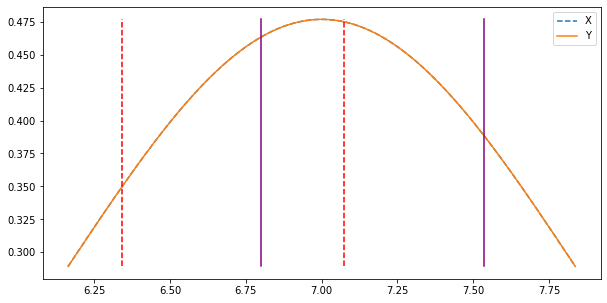

In [32]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(Xis_nr, pdfx_nr, label='X', ls='--')
ax.plot(Yis_nr, pdfy_nr, label='Y')

lim_inf, lim_sup = [np.min(pdfx_nr), np.max(pdfx_nr)]
one_x12, one_y12 = [ci_nrx[0],ci_nrx[0]],[lim_inf,lim_sup]
two_x12, two_y12 = [ci_nrx[1],ci_nrx[1]],[lim_inf,lim_sup]

o_x12, o_y12 = [ci_nry[0],ci_nry[0]],[lim_inf,lim_sup]
t_x12, t_y12 = [ci_nry[1],ci_nry[1]],[lim_inf,lim_sup]
ax.plot(one_x12, one_y12, two_x12, two_y12, color='red', ls='--')
ax.plot(o_x12, o_y12, t_x12, t_y12, color='purple')

plt.legend();

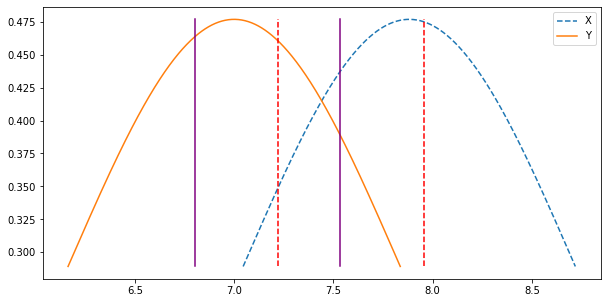

In [9]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(Xis_r, pdfx_r, label='X', ls='--')
ax.plot(Yis_r, pdfy_r, label='Y')

lim_inf, lim_sup = [np.min(pdfx_r), np.max(pdfx_r)]
one_x12, one_y12 = [ci_rx[0],ci_rx[0]],[lim_inf,lim_sup]
two_x12, two_y12 = [ci_rx[1],ci_rx[1]],[lim_inf,lim_sup]

o_x12, o_y12 = [ci_ry[0],ci_ry[0]],[lim_inf,lim_sup]
t_x12, t_y12 = [ci_ry[1],ci_ry[1]],[lim_inf,lim_sup]
ax.plot(one_x12, one_y12, two_x12, two_y12, color='red', ls='--')
ax.plot(o_x12, o_y12, t_x12, t_y12, color='purple')
plt.legend();

## 2

In [33]:
import pandas as pd

In [34]:
subject = np.arange(1,16,1)
before = [265, 240, 258, 295, 251, 245, 287, 314, 260, 279, 283, 240, 238, 225, 247]
after  = [229, 231, 227, 240, 238, 241, 234, 256, 247, 239, 246, 218, 219, 226, 233]
df = pd.DataFrame({'subject': subject, 'before': before, 'after':after})
df

,subject,before,after
0,1,265,229
1,2,240,231
2,3,258,227
3,4,295,240
4,5,251,238
5,6,245,241
6,7,287,234
7,8,314,256
8,9,260,247
9,10,279,239


Para solução da questão temos duas hipóteses:

$H_0$: low-fat diet and aerobic exercise não reduzem o nível de colesterol no sangue (com um nível de significância $\alpha=0.05$)

$H_1$: low-fat diet and aerobic exercise reduzem o nível de colesterol no sangue

In [37]:
res = ttest_rel(df['before'], df['after'] )

In [49]:
res.pvalue.round(4)

0.0001

Como o $p$-value ($0.0001$) é menor que $\alpha$, não conseguimos rejeitar a hipótese nula de que as médias são iguais, logo, podemos afirmar que dietas com baixa calorias e exercícios reduzem o nível de colesterol no sangue.

## 3

In [50]:
def test_estatistico_var(n, s2, s2_0):
    x_0 = ((n-1)*s2)/s2_0
    return x_0


1. O parâmetro de interesse é a variância $\sigma^2$
2. $H_0$: $\sigma_{x}^2 = \sigma_{y}^2$
3. $H_1$: $\sigma_{x}^2 \neq \sigma_{y}^2$
4. $\alpha=0.05$
5. O teste estatístico é definido pela função `x_0 = teste_estatistico_var()`
6. Rejeitamos $H_0$ se `x_0` $> \chi_{0.05,19}^2 = 30.14$ 
7. Calculos:

In [59]:
# rejeita a hipotese nula
def dict_variaveis(v):
    var_rej = {}
    Xv, mx_v, sx_v, Yv, my_v, sy_v = get_XY(f=1.26, v=v)
    amostraXv = np.random.choice(Xv, size=20)
    amostraYv = np.random.choice(Yv, size=20)
    x_0 = test_estatistico_var(20,sx_v,sy_v)
    var_rej['x'], var_rej['y'] = [amostraXv, amostraYv]
    var_rej['sx'],var_rej['sy'] = [sx_v, sy_v]
    var_rej['mx'],var_rej['my'] = [mx_v, my_v]
    var_rej['x_0'] = x_0
    return var_rej

In [60]:
rejeitar = dict_variaveis(0.6)
rejeitar['x_0']

31.666666666666664

In [62]:
nrejeitar = dict_variaveis(0.9)
nrejeitar['x_0']

21.111111111111107